In [1]:
import main
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
np.set_printoptions(suppress=False)
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import scipy

c:\Users\hefos\Exact-Analysis-of-Heterogeneous-Moran-Processes-in-Climate-Cooperation\src\main.py:8: SyntaxWarning: invalid escape sequence '\i'
  We have a state v \in S = [$v_1$, .... $v_n$] as the set of types of individuals in the population, so that $v_i$ is the type of individual i. |S| = $k^N$
c:\Users\hefos\Exact-Analysis-of-Heterogeneous-Moran-Processes-in-Climate-Cooperation\src\main.py:53: SyntaxWarning: invalid escape sequence '\s'
  $\frac{\sum_{v_i = u_{i*}}{f(v_i)}}{\sum_{v_i}f(v_i)}$


In [2]:

def public_goods_fitness_function(state,alpha,r, epsilon):
    number_of_contributors = state.sum()
    big_bit =  r * alpha * number_of_contributors / len(state)
    payoff = np.array([big_bit - alpha*x for x in state])
    return 1 + (epsilon * payoff)

In [3]:
state_space = main.get_state_space(N=4,k=2)
r_values = np.linspace(1, 4, 2000)
alpha_values = np.linspace(0.5,6,2000)
one_coop_values = np.zeros(2000)
two_coop_values = np.zeros(2000)
three_coop_values = np.zeros(2000)


In [89]:
k = 0
for r in r_values:

    transition_matrix = main.generate_transition_matrix(state_space = state_space, fitness_function=public_goods_fitness_function, r=r, alpha=2, epsilon = 0.2)
    
    probability_space = main.get_absorption_probabilities(
        transition_matrix=transition_matrix,
        state_space = state_space,
        exponent_coefficient=50
    )


    one_coop_values[k] = probability_space[1][3]

    two_coop_values[k] = probability_space[6][3]

    three_coop_values[k] = probability_space[13][3]


    k += 1

print(one_coop_values)
print(two_coop_values)
print(three_coop_values)

[0.17940621 0.17940621 0.17940621 ... 0.17940621 0.17940621 0.17940621]
[0.4010202 0.4010202 0.4010202 ... 0.4010202 0.4010202 0.4010202]
[0.67199943 0.67199943 0.67199943 ... 0.67199943 0.67199943 0.67199943]


<function matplotlib.pyplot.show(close=None, block=None)>

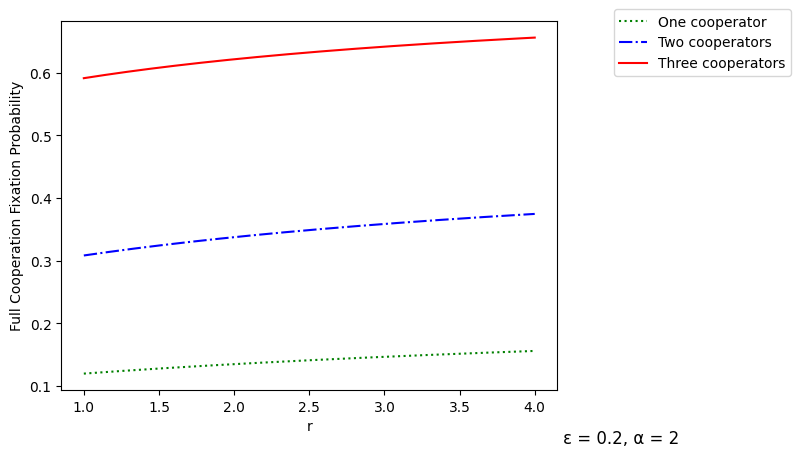

In [85]:
plt.plot(r_values, one_coop_values, color = 'green', label = 'One cooperator', linestyle = ':')

plt.plot(r_values, two_coop_values, color = 'blue', label = 'Two cooperators', linestyle = '-.')

plt.plot(r_values, three_coop_values, color = 'red', label = 'Three cooperators', linestyle = 'solid')

plt.xlabel("r")
plt.ylabel("Full Cooperation Fixation Probability")
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.figtext(1, 0, 'ε = 0.2, α = 2', wrap=True, horizontalalignment='center', fontsize=12)
plt.show

In [41]:
public_goods_fitness_function(state = np.array([1,0,1,0]), alpha = 4, r = 2, epsilon = 0.001)

array([1.000e-03, 4.001e+00, 1.000e-03, 4.001e+00])

In [86]:
k = 0
for alpha in alpha_values:

    transition_matrix = main.generate_transition_matrix(state_space = state_space, fitness_function=public_goods_fitness_function, r=2, alpha=alpha, epsilon = 0.2)
    
    probability_space = main.get_absorption_probabilities(
        transition_matrix=transition_matrix,
        state_space = state_space,
        exponent_coefficient=50
    )


    one_coop_values[k] = probability_space[1][3]

    two_coop_values[k] = probability_space[6][3]

    three_coop_values[k] = probability_space[13][3]


    k += 1

print(one_coop_values)
print(two_coop_values)
print(three_coop_values)

[0.21445859 0.21427922 0.21409998 ... 0.03431402 0.03427625 0.0342385 ]
[0.45183395 0.45158678 0.45133976 ... 0.17135825 0.17128723 0.17121626]
[0.71329217 0.71310078 0.71290948 ... 0.47272283 0.47265409 0.47258538]


<function matplotlib.pyplot.show(close=None, block=None)>

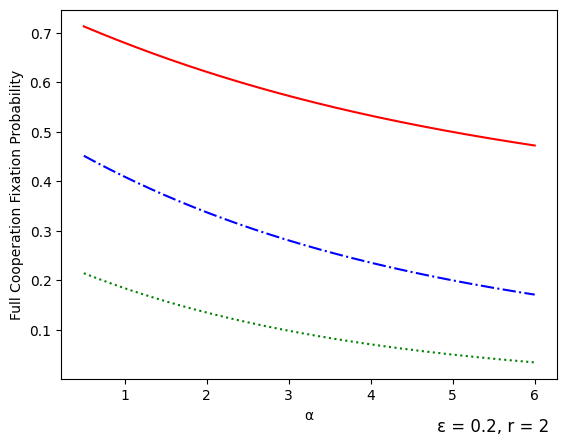

In [87]:
plt.plot(alpha_values, one_coop_values, color = 'green', label = 'One cooperator', linestyle = ':')

plt.plot(alpha_values, two_coop_values, color = 'blue', label = 'Two cooperators', linestyle = '-.')

plt.plot(alpha_values, three_coop_values, color = 'red', label = 'Three cooperators', linestyle = 'solid')

plt.xlabel("α")
plt.ylabel("Full Cooperation Fixation Probability")
plt.figtext(0.8, 0, 'ε = 0.2, r = 2', wrap=True, horizontalalignment='center', fontsize=12)
plt.show

In [30]:
k = 0
quarter_coop_values_ceil = np.zeros(10)
half_coop_values_ceil = np.zeros(10)
three_quarter_coop_values_ceil = np.zeros(10)
quarter_coop_values_floor = np.zeros(10)
half_coop_values_floor = np.zeros(10)
three_quarter_coop_values_floor = np.zeros(10)
N_values = np.arange(3, 13)
one_coop_values = np.zeros(10)
almost_all_coop_values = np.zeros(10)

for N in N_values:

    state_space = main.get_state_space(N=N, k=2)


    transition_matrix = main.generate_transition_matrix(state_space = state_space, fitness_function=public_goods_fitness_function, r=2, alpha=2, epsilon = 0.2)
    
    probability_space = main.   get_absorption_probabilities(
        transition_matrix=transition_matrix,
        state_space = state_space,
        exponent_coefficient=50
    )

    one_coop_index = np.where([np.sum(s) == 1 for s in state_space])[0][0]

    quarter_coop_index_ceil = np.where([np.sum(s) == np.ceil(N / 4) for s in state_space])[0][0]

    half_coop_index_ceil = np.where([np.sum(s) == np.ceil(N / 2) for s in state_space])[0][0]

    three_quarter_coop_index_ceil = np.where([np.sum(s) == np.ceil(3 * N / 4) for s in state_space])[0][0]

    almost_all_coop_index = np.where([np.sum(s) == N-1 for s in state_space])[0][0]

    quarter_coop_index_floor = np.where([np.sum(s) == np.floor(N / 4) for s in state_space])[0][0]

    half_coop_index_floor = np.where([np.sum(s) == np.floor(N / 2) for s in state_space])[0][0]

    three_quarter_coop_index_floor = np.where([np.sum(s) == np.floor(3 * N / 4) for s in state_space])[0][0]

    print(state_space[quarter_coop_index_floor])

    one_coop_values[k] = probability_space[one_coop_index][3]

    quarter_coop_values_ceil[k] = probability_space[quarter_coop_index_ceil][3]

    half_coop_values_ceil[k] = probability_space[half_coop_index_ceil][3]

    three_quarter_coop_values_ceil[k] = probability_space[three_quarter_coop_index_ceil][3]

    three_quarter_coop_values_floor[k] = probability_space[three_quarter_coop_index_floor][3]

    quarter_coop_values_floor[k] = probability_space[quarter_coop_index_floor][3]

    half_coop_values_floor[k] = probability_space[half_coop_index_floor][3]

    three_quarter_coop_values_floor[k] = probability_space[three_quarter_coop_index_floor][3]

    almost_all_coop_values[k] = probability_space[almost_all_coop_index][3]


    k += 1



print(quarter_coop_values_ceil)
print(half_coop_values_ceil)
print(three_quarter_coop_values_ceil)

print(quarter_coop_values_floor)
print(half_coop_values_floor)
print(three_quarter_coop_values_floor)

[0 0 0]
[0 0 0 1]
[0 0 0 0 1]
[0 0 0 0 0 1]
[0 0 0 0 0 0 1]
[0 0 0 0 0 0 1 1]
[0 0 0 0 0 0 0 1 1]
[0 0 0 0 0 0 0 0 1 1]
[0 0 0 0 0 0 0 0 0 1 1]
[0 0 0 0 0 0 0 0 0 1 1 1]
[0.22527949 0.13492318 0.21288053 0.1327289  0.07934879 0.04483527
 0.0529532  0.02814095 0.01410056 0.00665051]
[0.55453525 0.33751358 0.39977149 0.25606947 0.27784121 0.17175562
 0.17734025 0.10444849 0.10489525 0.05864388]
[1.         0.62134606 0.65747644 0.67566609 0.68353046 0.45416456
 0.45499113 0.45265429 0.44826755 0.28264891]
[0.         0.13492318 0.08368281 0.05080722 0.02916807 0.04483527
 0.02379758 0.0118347  0.00550809 0.00665051]
[0.22527949 0.33751358 0.21288053 0.25606947 0.1588861  0.17175562
 0.10143221 0.10444849 0.05856411 0.05864388]
[0.55453525 0.62134606 0.39977149 0.43261967 0.44810909 0.45416456
 0.29094217 0.29034687 0.28730197 0.28264891]


<function matplotlib.pyplot.show(close=None, block=None)>

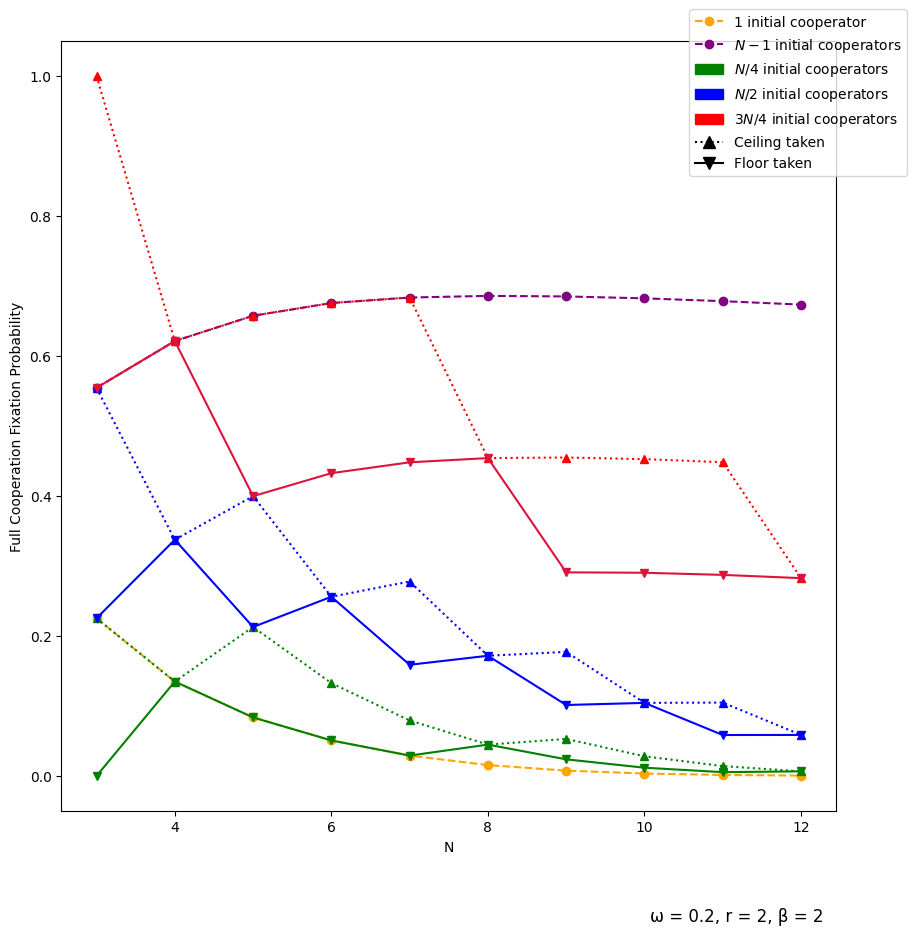

In [76]:
plt.figure(figsize=(10, 10))

plt.plot(N_values, one_coop_values, color = 'orange', linestyle = '--', marker = 'o', label = '1 initial cooperator')

plt.plot(N_values, almost_all_coop_values, color = 'purple', linestyle = '--', marker = 'o', label = '$N-1$ initial cooperators')
#plt.scatter(N_values, one_coop_values, color = 'orange', label = 'one cooperator', marker = 'o')

plt.plot(N_values, quarter_coop_values_ceil, color = 'green', linestyle = ':', marker = '^')
#plt.scatter(N_values, quarter_coop_values_ceil, color = 'green',  marker = '^')

plt.plot(N_values, half_coop_values_ceil, color = 'blue', linestyle = ':', marker = '^')
#plt.scatter(N_values, half_coop_values_ceil, color = 'blue', marker = '^')

plt.plot(N_values, three_quarter_coop_values_ceil, color = 'red', linestyle = ':', marker = '^')
#plt.scatter(N_values, three_quarter_coop_values_ceil, color = 'red', marker = '^')

plt.plot(N_values, quarter_coop_values_floor, color = 'green', linestyle = 'solid',marker = 'v')
#plt.scatter(N_values, quarter_coop_values_floor, color = 'green', marker = 'v')

plt.plot(N_values, half_coop_values_floor, color = 'blue', linestyle = 'solid', marker = 'v')
#plt.scatter(N_values, half_coop_values_floor, color = 'blue', marker = 'v')

plt.plot(N_values, three_quarter_coop_values_floor, color = 'crimson', linestyle = 'solid', marker = 'v')
#plt.scatter(N_values, three_quarter_coop_values_floor, color = 'crimson', marker = 'v')


#plt.scatter(N_values, almost_all_coop_values, color = 'purple', marker = 'o', label = '$N-1$ initial cooperators')

green_patch = mpatches.Patch(color='green', label = '$N/4$ initial cooperators')
blue_patch = mpatches.Patch(color='blue',  label = '$N/2$ initial cooperators')
red_patch = mpatches.Patch(color='red', label = '$3N/4$ initial cooperators')

black_ceil = mlines.Line2D([], [], color='black', marker='^', linestyle=':',
                               markersize=8, label='Ceiling taken')

black_v = mlines.Line2D([], [], color='black', marker='v', linestyle='solid',
                               markersize=8, label='Floor taken')


handles, labels = plt.gca().get_legend_handles_labels()

handles.extend([green_patch, blue_patch, red_patch, black_ceil, black_v])
labels.extend(['$N/4$ initial cooperators', '$N/2$ initial cooperators',
               '$3N/4$ initial cooperators','Ceiling taken','Floor taken'])


plt.xlabel("N")
plt.ylabel("Full Cooperation Fixation Probability")
plt.figtext(0.8, 0, 'ω = 0.2, r = 2, β = 2', wrap=True, horizontalalignment='center', fontsize=12)
plt.legend(handles, labels, bbox_to_anchor=(1.1, 1.05))
plt.show

In [15]:
Q = main.extract_Q(transition_matrix=transition_matrix)

Q

array([[0.25, 0.25, 0.5 , 0.  ],
       [0.5 , 0.  , 0.  , 0.2 ],
       [0.5 , 0.  , 0.  , 0.5 ],
       [0.  , 0.5 , 0.25, 0.  ]])

In [16]:
R = main.extract_R(transition_matrix=transition_matrix)

R

array([[0.  , 0.  ],
       [0.  , 0.3 ],
       [0.  , 0.  ],
       [0.25, 0.  ]])

In [7]:
def get_absorption_probabilities(transition_matrix, state_space):
    """Given a transition matrix and a corresponding state space

    generate the absorption probabilities. This does not yet support a

    symbolic transition matrix input

    Parameters
    -------------
    state_space: numpy.array, a state space

    transition matrix: numpy.array, a matrix of transition probabilities corresponding to the state space

    Returns
    -------------
    dictionary of values: tuple([starting state]): [[absorbing state 1, absorption probability 1], [absorbing state 2, absorption probability 2]]
    """

    absorption_index = main.get_absorbing_state_index(state_space=state_space)

    absorbing_transition_matrix = main.get_absorption_matrix(transition_matrix=transition_matrix)
    


    combined_values = np.array(
        [
            np.ravel(np.column_stack((absorption_index, absorbing_transition_matrix[:, k])))
            for k, y in enumerate(absorbing_transition_matrix)
        ]
    )

    return {
        state_index: combined_values[state_index]
        for state_index, state in enumerate(state_space)
    }

In [10]:
x = sym.Symbol("x")
y = sym.Symbol("y")

transition_matrix = np.array(
    [
        [1, 0, 0, 0],
        [
            x / (2 * x + 2 * y),
            y / (2 * x + 2 * y),
            (1 - (y / (2 * x + 2 * y)) - x / (2 * x + 2 * y)),
            y / (2 * x + 2 * y),
        ],
        [
            y / (2 * x + 2 * y),
            0,
            (1 - (y / (2 * x + 2 * y)) - x / (2 * x + 2 * y)),
            x / (2 * x + 2 * y),
        ],
        [0, 0, 0, 1],
    ]
)

state_space = np.array([(0, 0), (0, 1), (1, 0), (1, 1)])

In [13]:
R = main.extract_R_symbolic(transition_matrix = transition_matrix)

In [14]:
Q = main.extract_Q(transition_matrix = transition_matrix)

In [15]:
Q_symbolic = sym.Matrix(Q)
R_symbolic = sym.Matrix(R)
    
I = sym.eye(Q_symbolic.shape[0])
B = (I - Q_symbolic).inv() * R_symbolic

In [16]:
B

Matrix([
[x/(2*x + y) + y/(2*x + y), x/(2*x + y) + y/(2*x + y)],
[          2*y/(2*x + 2*y),           2*x/(2*x + 2*y)]])